# 로지스틱 회귀

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("font", family = "NanumGothic")
plt.rc("axes", unicode_minus = False)

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/4-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

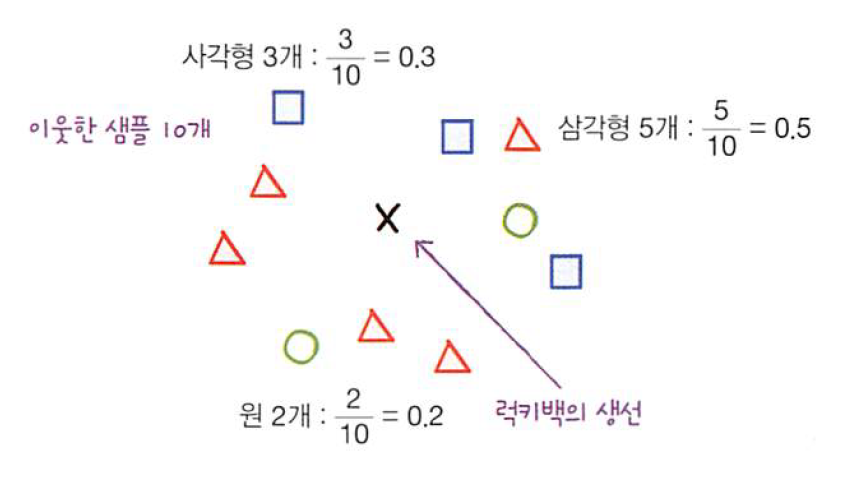

In [2]:
# from IPython.display import Image
# Image('../fig/hg_prob_knn.png')

### 데이터 준비하기

In [2]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
## Unique 한 label 보기

fish['Species'].value_counts()
# print(pd.unique(fish['Species']))

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [5]:
# fish_input = fish.select_dtypes(include = ["float64"]).to_numpy()
# fish.select_dtypes(include = ["number"])
# fish.select_dtypes(include = np.number)

In [5]:
## features 선택

fish_input = fish[['Weight','Length','Diagonal','Height','Width']]

# temp = fish[['Weight','Length','Diagonal','Height','Width']]
# print('temp 자료 타입 = ', type(temp))


# print('fish_input 자료 타입 = ', type(fish_input))

In [6]:
print(fish_input[:5])

   Weight  Length  Diagonal   Height   Width
0   242.0    25.4      30.0  11.5200  4.0200
1   290.0    26.3      31.2  12.4800  4.3056
2   340.0    26.5      31.1  12.3778  4.6961
3   363.0    29.0      33.5  12.7300  4.4555
4   430.0    29.0      34.0  12.4440  5.1340


In [7]:
## target 선택

fish_target = fish['Species']
fish_target[:5]

0    Bream
1    Bream
2    Bream
3    Bream
4    Bream
Name: Species, dtype: object

In [8]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

# Compute the mean and std to be used for later scaling.
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### k-최근접 이웃 분류기의 확률 예측

In [10]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [11]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [12]:
print(kn.predict(test_scaled[:5]))
print(test_target[:5])

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
78         Perch
155        Smelt
128         Pike
55     Whitefish
94         Perch
Name: Species, dtype: object


In [13]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [15]:
## 4번째 샘플의 이웃자료 확인

# Expected 2D array
distances, indexes = kn.kneighbors(test_scaled[3:4])

print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


## 로지스틱 회귀

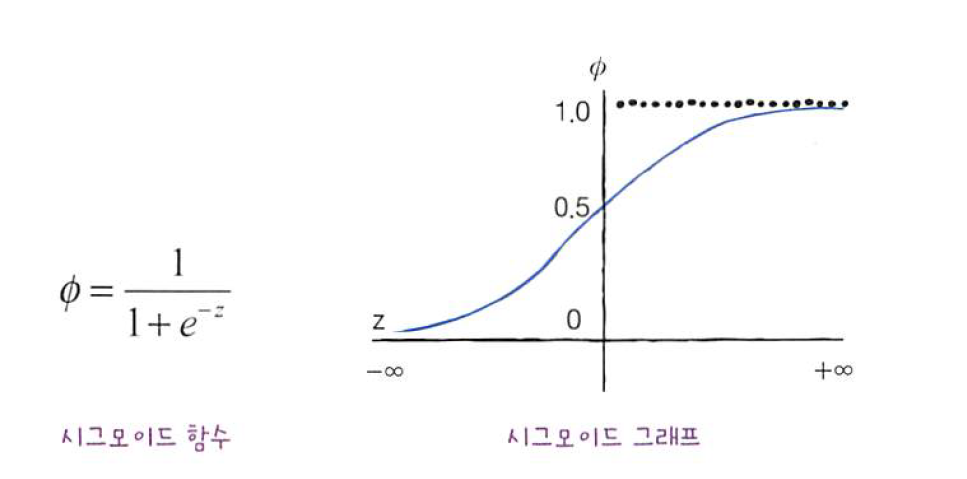

In [16]:
# from IPython.display import Image
# Image('../fig/hg_sigmoid.png')

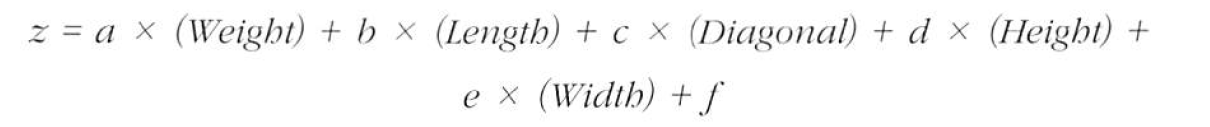

In [17]:
# from IPython.display import Image
# Image('../fig/hg_sigmoid_formula.png')

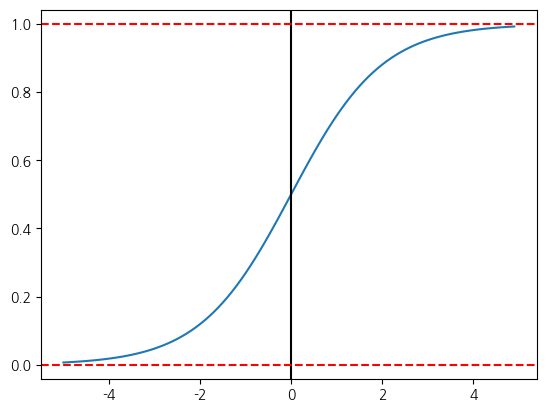

In [17]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.axvline(0, color = "k")
plt.axhline(1, linestyle = "--", color = "r")
plt.axhline(0, linestyle = "--", color = "r")

plt.show()

### 로지스틱 회귀로 이진 분류 수행하기

### Boolean indexing

In [18]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [19]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [21]:
print(lr.predict(train_bream_smelt[:5]))
print(target_bream_smelt[:5])

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
26     Bream
146    Smelt
22     Bream
11     Bream
27     Bream
Name: Species, dtype: object


In [22]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [23]:
print(lr.classes_)

['Bream' 'Smelt']


In [24]:
print(lr.coef_, lr.intercept_)

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


### z-값 계산하기

In [25]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


### sigmoid 함수를 이용해서 확률 구하기

In [27]:
from scipy.special import expit
# expit(x) = 1/(1+exp(-x))

print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


# 로지스틱 회귀로 와인 분류하기

In [ ]:
## 전체소스코드
## https://bit.ly/hg-05-1

In [2]:
import numpy as np
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine-date')

In [5]:
wine.head()

#Print a concise summary of a DataFrame
wine.info()

# Describe summary statistics.
# 요약 통계량
wine.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [8]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

array([0., 0., 0., ..., 1., 1., 1.])

In [7]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, stratify = target)

In [9]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [10]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print('train score = \n', lr.score(train_scaled, train_target))
print('test score = \n', lr.score(test_scaled, test_target))

train score = 
 0.7806426784683471
test score = 
 0.78


In [16]:
print(lr.predict(test_scaled[:10]))
print(test_target[:10])
# lr.decision_function(test_scaled[:10])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 0. 0. 1. 0. 1. 1. 1.]


array([2.78593963, 2.84375341, 1.54147146, 0.37086813, 0.53400774,
       4.48161054, 0.97232819, 4.849777  , 2.29590223, 2.99518753])

In [17]:
p = 1/(1+ np.exp(0.16631))
print(p)

0.458518068404389


In [18]:
print(lr.coef_, lr.intercept_)

[[ 0.53174797  1.65826809 -0.71009494]] [1.79153335]


### 로지스틱 회귀로 다중 분류 수행하기

In [28]:
# C =Inverse of regularization strength; must be a positive float.
# max_iter = Maximum number of iterations taken for the solvers to converge.

lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [29]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [30]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [31]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [32]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


In [33]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [36]:
from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [37]:
decision

array([[ -6.49810801,   1.0322291 ,   5.16362787,  -2.72866514,
          3.33887337,   0.32652214,  -0.63447933],
       [-10.85947943,   1.92718119,   4.77100606,  -2.39847909,
          2.97809059,   7.84134858,  -4.2596679 ],
       [ -4.33529022,  -6.23307877,   3.17445751,   6.48671361,
          2.35757971,   2.4211656 ,  -3.87154744],
       [ -0.68336394,   0.45272694,   2.64700263,  -1.1866726 ,
          3.26454127,  -5.75275428,   1.25851998],
       [ -6.39707425,  -1.99274328,   5.81574195,  -0.11034139,
          3.50282848,  -0.11162001,  -0.7067915 ]])